# ML/AI training Notebook

I searched for some datasets online and found this one that looks simple enough to use for training. The idea is to evolve as we learn new techniques.


# Dataset description:
    

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


# Loading and cleaning

Besides removing columns ['id','date', 'zipcode'], I'm not really cleaning anything as we didn't learn how to do that.
* TODO: proper cleaning

In [2]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split

%matplotlib inline

In [26]:
# load dataset from .csv, 
# split into X and y and 
# remove columns I don't want or need ['id','date', 'zipcode'] 

dataset = pd.read_csv('kc_house_data.csv')
df = pd.DataFrame(dataset)
y = dataset[['price']]
X = dataset.drop(['price', 'id','date','zipcode'],axis=1) # Q1: why get rid of zipcode? may be an important variable; 
                                                          # for instance, to see location of more expensive/shipper houses
                                                          # same for date...cycle, seasonality, etc...does it affect price?

# Visualizing some data:

In [5]:
X.shape

(21613, 17)

In [6]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
X.isnull().sum() # Q2: does it mean no null values in X?

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
X.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


# Categorical data

I've noticed some columns with categorical data: waterfront, view, condition, grade. So I'll remove them as well. 
I guess later, when we learn how to use them, we can put them back.

TODO: add categorical data

In [8]:
X2 = X.drop(['waterfront', 'view','condition','grade'],axis=1) # S1: wouldn't get rid of them, useful for dummy variables
feature_names = X2.columns.values
print(X2.shape)
print(feature_names)

(21613, 13)
['bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15'
 'sqft_lot15']


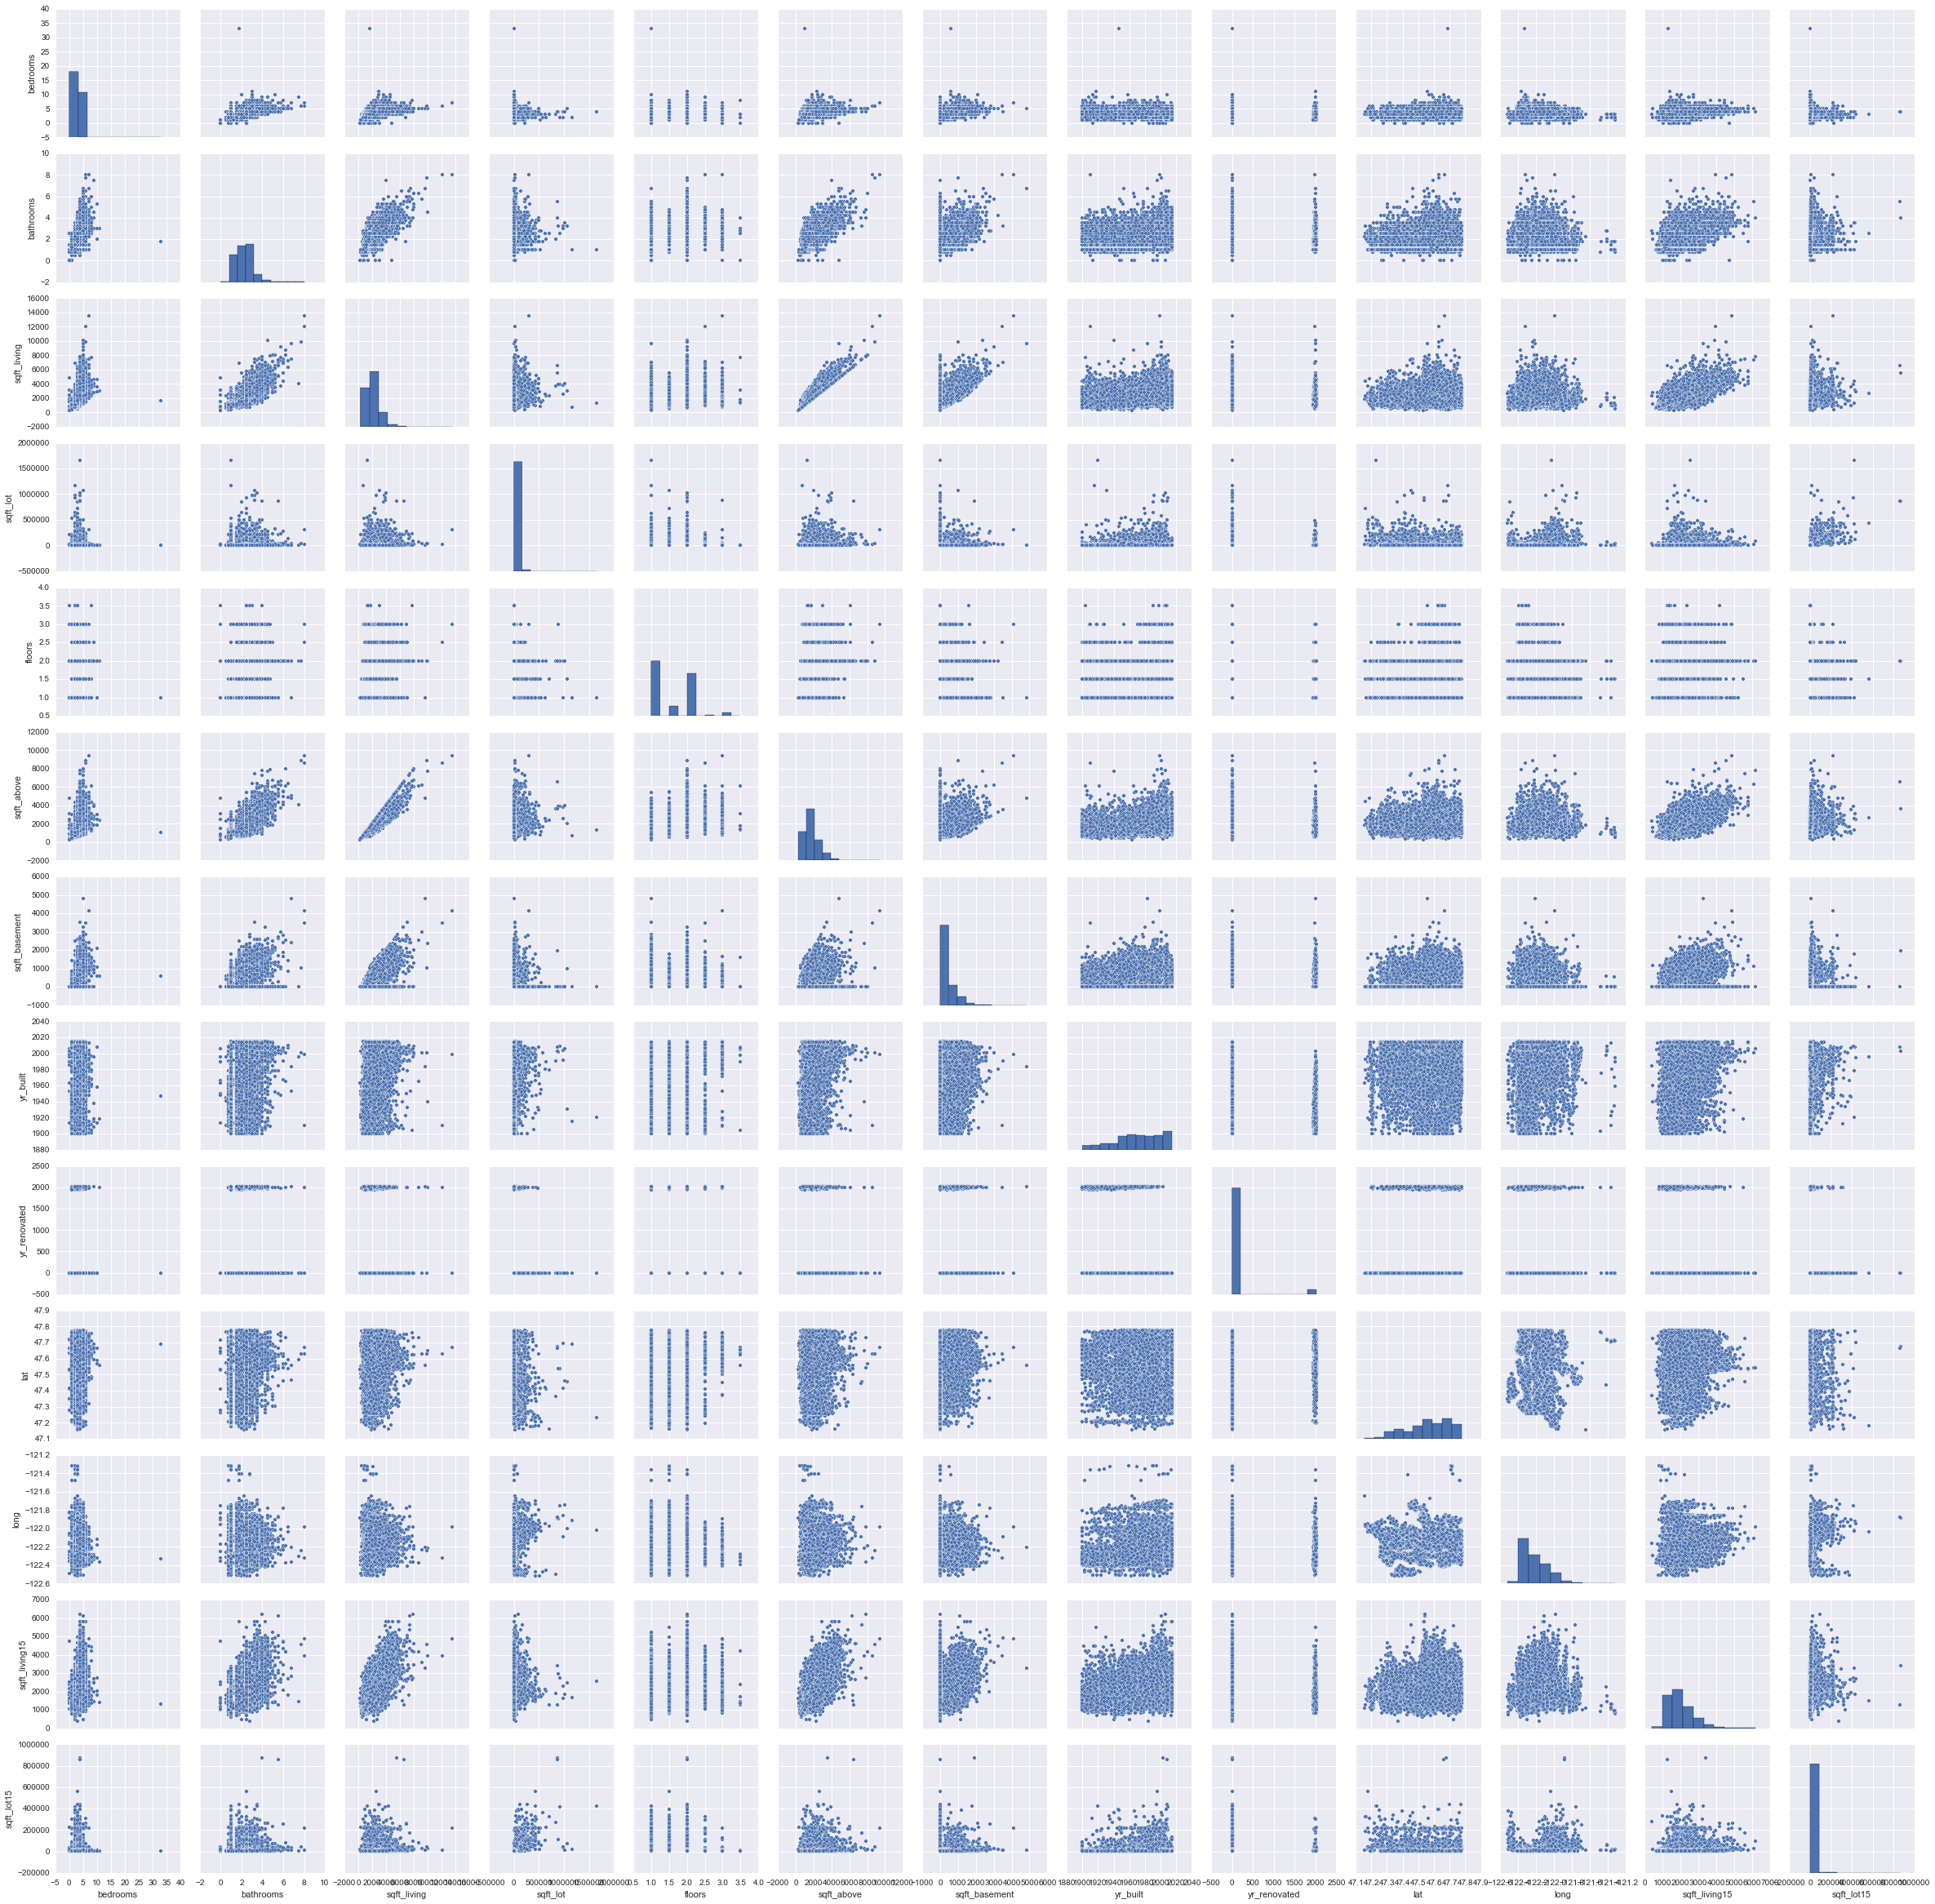

In [9]:
sns.pairplot(X2)

In [34]:
# Naive model with all non-categorial parameters
lr=LinearRegression()
lr.fit(X2,y)
preds = lr.predict(X2)
score = round(lr.score(X2,y),2)
print(score)

0.62


In [35]:
# Naive movel with categorical data as dummies
df =  pd.get_dummies(X, columns = ['waterfront', 'view','condition','grade'])
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,3,1.00,1180,5650,1,1180,0,1955,0,47.5112,...,0,0,0,1,0,0,0,0,0,0
1,3,2.25,2570,7242,2,2170,400,1951,1991,47.7210,...,0,0,0,1,0,0,0,0,0,0
2,2,1.00,770,10000,1,770,0,1933,0,47.7379,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1,1050,910,1965,0,47.5208,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680,8080,1,1680,0,1987,0,47.6168,...,0,0,0,0,1,0,0,0,0,0


In [36]:
# Naive model with all non-categorial parameters
lr.fit(df,y)
preds = lr.predict(df)
score = round(lr.score(df,y),5)
print(score)

0.72668


This looks like it added value.

In [37]:
# One more idea: Generate new features
# Square feet / room
df["sqft/room"]=df.sqft_living/(df.bedrooms+df.bathrooms)
df["sqft/room"].replace(np.inf,df["sqft/room"].median(),inplace=True)
print(df["sqft/room"].median())
df["sqft/room"].describe()

354.0


count    21613.000000
mean       372.866003
std        103.508990
min         46.618705
25%        298.947368
50%        354.000000
75%        428.000000
max       1824.000000
Name: sqft/room, dtype: float64

In [38]:
lr.fit(df,y)
preds = lr.predict(df)
score = round(lr.score(df,y),5)
print(score)

0.72992


# Run linear regression for each parameter individually

Just for curiosity, I would like to see how the model would behave if applied to each feature individually. These charts are also good to check if there's a linear relationship between each input vs price.



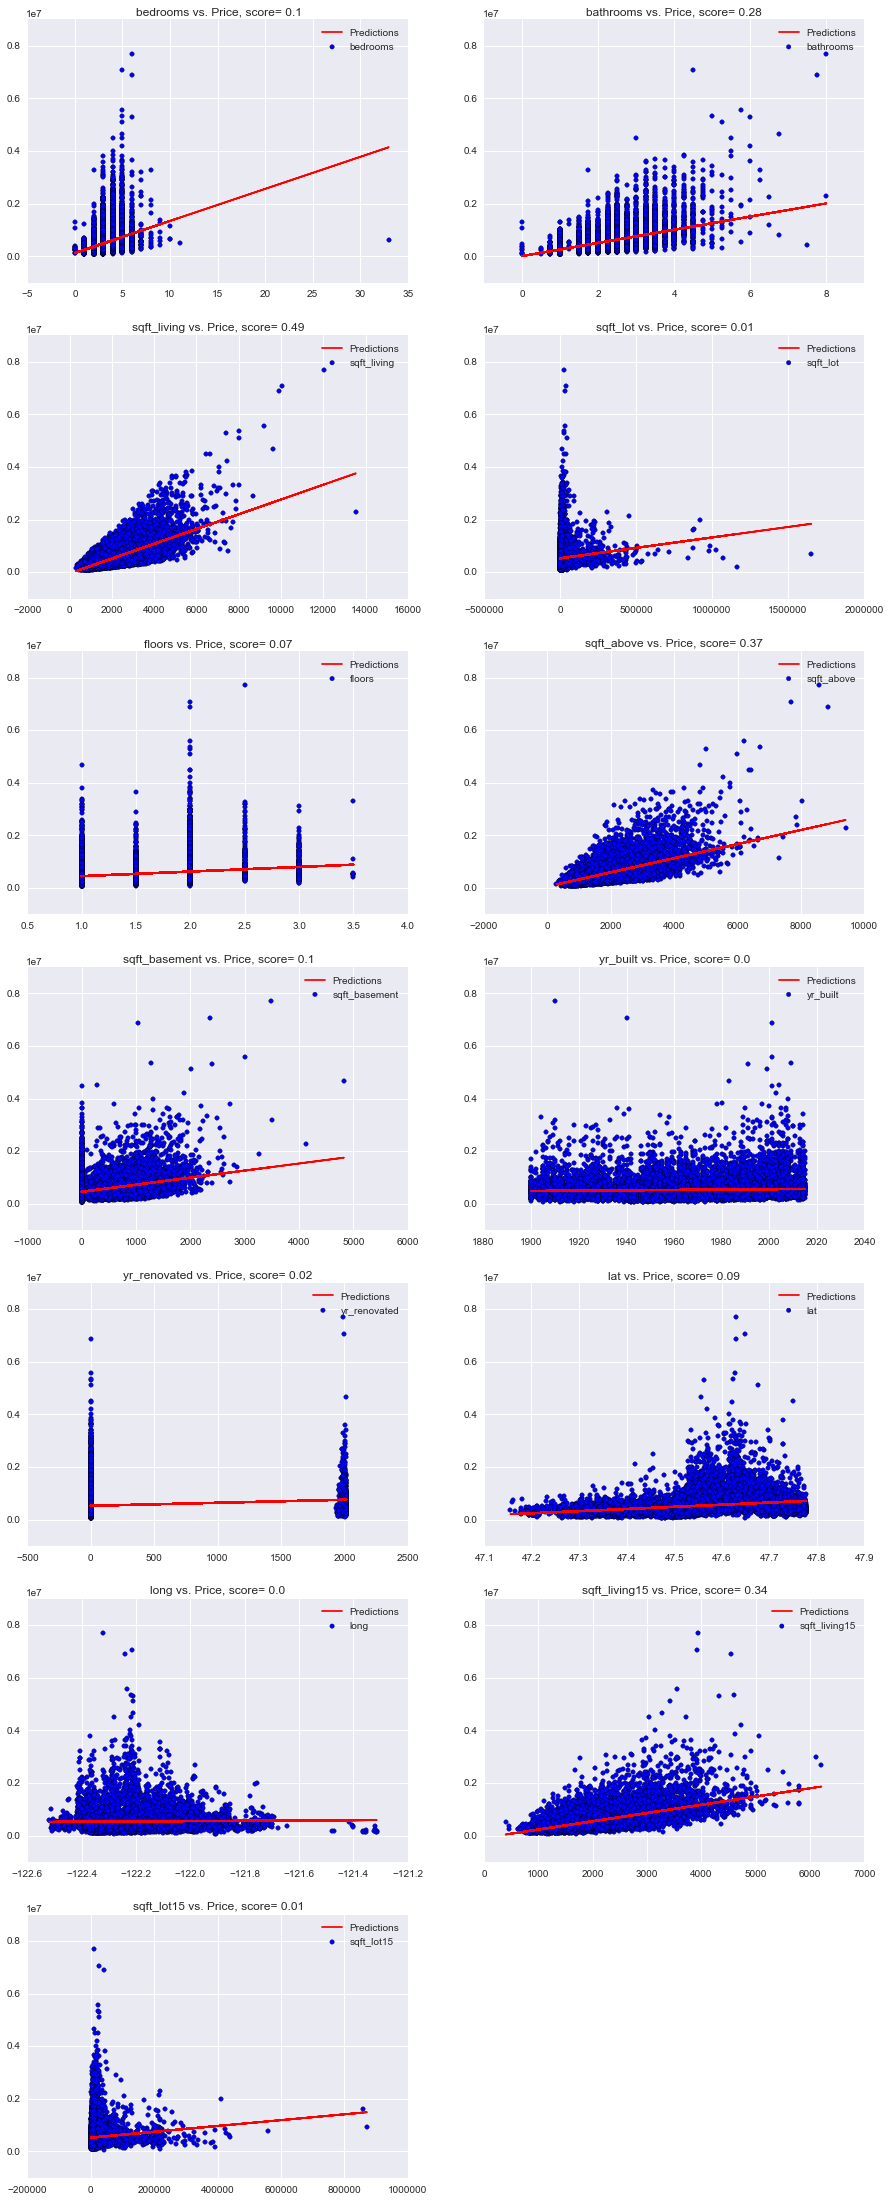

In [15]:
lr = LinearRegression()

#Iterate over features, fit the model, and plot chart for each one of them including "score".
plt.figure(figsize = (15, 50))
scores = pd.Series( index=feature_names, dtype='float64')
for index, feature in enumerate(feature_names):
    X_input = X[[feature]]
    lr.fit(X_input, y)
    preds = lr.predict(X_input)
    score = round(lr.score(X_input,y),2)
    plt.subplot(9, 2, index+1)
    plt.scatter(X_input, y, label = feature)
    plt.plot(X_input, preds, color = 'red', label = 'Predictions')
    plt.legend()
    plt.title(feature +' vs. Price, score= ' + str(score))
    scores[feature] = score

In [16]:
print(scores)

bedrooms         0.10
bathrooms        0.28
sqft_living      0.49
sqft_lot         0.01
floors           0.07
sqft_above       0.37
sqft_basement    0.10
yr_built         0.00
yr_renovated     0.02
lat              0.09
long             0.00
sqft_living15    0.34
sqft_lot15       0.01
dtype: float64


# First conclusions:

- Some features don't seem to have a linear relationship with 'price': yr_built, yr_renovated, long
- For this model, the score is the R^2. We can already see that some features are better than others, individually:

In [215]:
print(scores.nlargest(5))

sqft_living      0.49
sqft_above       0.37
sqft_living15    0.34
bathrooms        0.28
bedrooms         0.10
dtype: float64


In [216]:
print(scores.nsmallest(5))

yr_built        0.00
long            0.00
sqft_lot        0.01
sqft_lot15      0.01
yr_renovated    0.02
dtype: float64


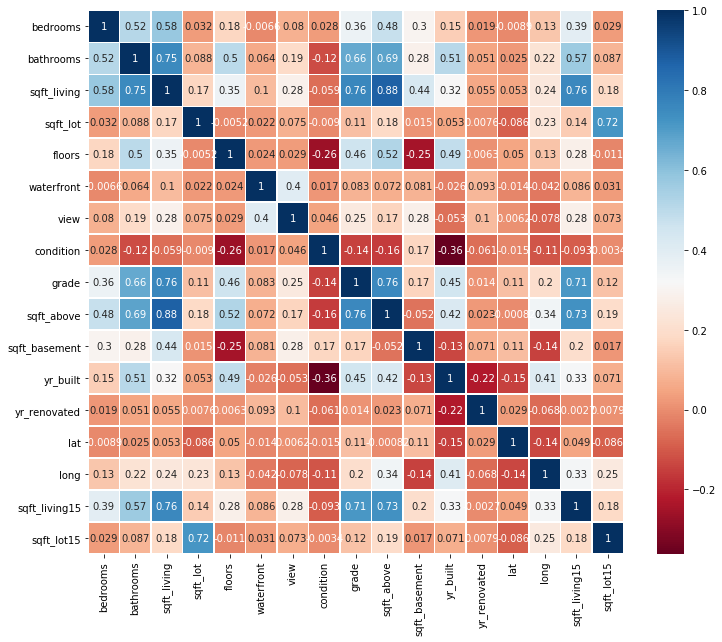

In [25]:
#sns.heatmap(X.corr()) Helmut: replace this line for the two lines below to get better view
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), linewidth=0.5,annot=True,cmap="RdBu"); 

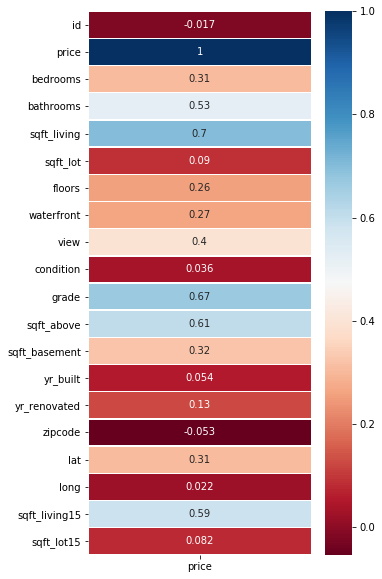

In [39]:
# Helmut: this is to show the correlations between the target variable price and the X's variables
# The heatmap above display only correlations among X's variables and we are not interested in that
plt.figure(figsize=(5,10))
corr = df.corr()
sns.heatmap(pd.DataFrame(corr.price),annot=True,linewidth=0.5,cmap="RdBu")

# Conclusions from Price vs. X variables Correlations (Helmut)

- There are 5 X's variables that has a positive&significant magnitude correlation with price:
    - bathrooms: 0.53 (Number of bathrooms, where .5 accounts for a room with a toilet but no shower)
    - sqft_living15: 0.59 (The square footage of interior housing living space for the nearest 15 neighbors)
    - sqft_above: 0.61 (The square footage of the interior housing space that is above ground level)
    - grade: 0.67 (An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level                    of construction and design, and 11-13 have a high quality level of construction and design)
    - sqft_living: 0.7 (Square footage of the apartments interior living space)
   

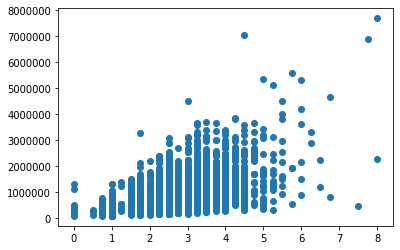

In [45]:
# Scatterplots of price against highly correlated X's variables (i.e. light blue getting darker as it goes up)
plt.scatter(df.bathrooms,df.price);

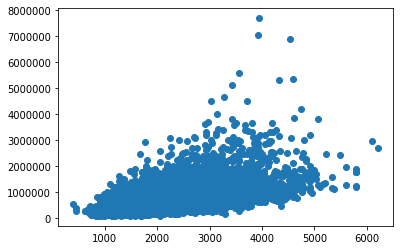

In [41]:
plt.scatter(df.sqft_living15,df.price);

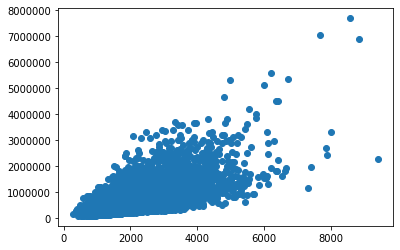

In [42]:
plt.scatter(df.sqft_above,df.price);

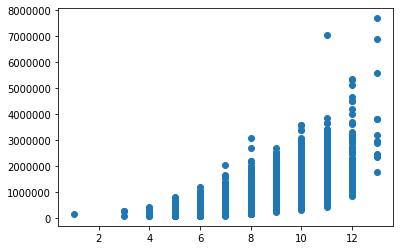

In [43]:
plt.scatter(df.grade,df.price);

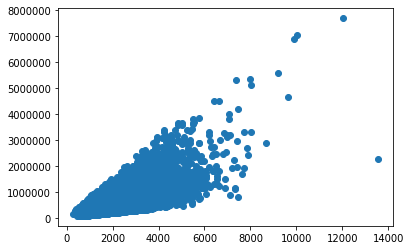

In [44]:
plt.scatter(df.sqft_living,df.price);

In [73]:
# Defining Functions to run the model (taken from the homework)
def select_columns(data_frame, column_names):
    sub_df = data_frame[[col for col in column_names]]
    return sub_df
def column_cutoff(data_frame, cutoffs):
    data_subset = data_frame
    for column_limits in cutoffs:
        data_subset = data_subset.loc[data_subset[column_limits[0]] >= column_limits[1],:]
        data_subset = data_subset.loc[data_subset[column_limits[0]] <= column_limits[2],:]
    return data_subset
def least_square_weights(input_x, target_y):
    if input_x.shape[0] < input_x.shape[1]:
        input_x = np.transpose(input_x)
        
    if target_y.shape[0] < target_y.shape[1]:
        target_y = np.transpose(target_y)
        
        
    ones = np.ones((len(target_y), 1), dtype=int)
    
    augmented_x = np.concatenate((ones, input_x), axis=1)
    
    left_multiplier = np.matmul(np.linalg.inv(np.matmul(np.transpose(augmented_x), 
                                                        augmented_x)),
                                np.transpose(augmented_x))
    w_ls = left_multiplier@target_y   #strangely enough didn`t work with w_ls = np.matmul(left_multiplier, target_y)
    
    return w_ls

In [74]:
df_sub = select_columns(df, ['bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'price'])
cutoffs = [('bathrooms', 0, 7.5), ('sqft_living15', 500, 6000), ('sqft_above', 0, 8000), ('sqft_living', 0, 10000),
          ('price', 10000, 750000)]
df_sub_cutoff = column_cutoff(df_sub, cutoffs)
X=df_sub_cutoff.drop(['price'],axis=1)
y=df_sub_cutoff[['price']]
weights = least_square_weights(X, y)
print(weights)

           price
0 -153893.925427
1   -6587.359924
2      37.050338
3     -48.385436
4   60341.055384
5      83.999806


In [67]:
weights = np.matmul(left_multiplier, y) # this is the error that I get if I use np.matmul instead od @

ValueError: Shape of passed values is (6, 1), indices imply (18029, 1)

# Helmut: until here today (July 7th)
My plan is to keep working with regression model in the following issues:
- include dummies
- get $R^2$ & other metrics
- Crossvalidation
- Polynomial features

In [22]:
get_dummies

NameError: name 'get_dummies' is not defined

In [ ]:
# Naive model

# Rebuild input dataframe

Based on my first conclusions, I decided to remove these features: [yr_built, yr_renovated, long, sqft_lot, sqft_lot15] . I'm not sure this is the right thing to do though, it seems logical to keep some of them. 


These are the result for R^2 and weights:

In [217]:
X = X.drop(['yr_built', 'yr_renovated', 'long', 'sqft_lot', 'sqft_lot15'], axis=1)
print("Input features = ", X.columns.values)

Input features =  ['bedrooms' 'bathrooms' 'sqft_living' 'floors' 'sqft_above'
 'sqft_basement' 'lat' 'sqft_living15']


In [218]:
lr.fit(X, y)
preds = lr.predict(X)
score = round(lr.score(X,y),2)
print("R^2 = " + str(score))

R^2 = 0.58


In [219]:
print("features = " , X.columns.values)
print()
print("weights = ", lr.coef_)
print()
print("intercept = ", lr.intercept_)

features =  ['bedrooms' 'bathrooms' 'sqft_living' 'floors' 'sqft_above'
 'sqft_basement' 'lat' 'sqft_living15']

weights =  [[-4.98878577e+04  1.26916489e+04  1.77945281e+02 -2.32373164e+03
   8.05535665e+01  9.73917142e+01  6.98355097e+05  6.13750491e+01]]

intercept =  [-33193405.15927342]


# Next steps

- Split the data into train and test set to verify overfitting
- Try to include some of the columns we excluded to see if model improves
- Use "PolynomialFeatures" together with "Pipeline" to try to improve results
